In [1]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import random
import plotly.express as px
import seaborn as sns
import numpy as np

random.seed(9000)

plt.style.use("seaborn-ticks")
plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
%matplotlib inline

In [2]:
n_samples = 1000
n_replicates = 4  #number of sample replicates within each plate 
metadata_common = 'Metadata_moa'
metadata_perturbation = 'Metadata_broad_sample'
group_by_feature = 'Metadata_broad_sample'
#batch = "Scope1_MolDev_10X"

experiment_df = (
    pd.read_csv('output/experiment-metadata.tsv', sep='\t')
#    .query('Batch==@batch')
)
experiment_df.tail(50)

,Vendor,Batch,Plate_Map_Name,Assay_Plate_Barcode,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
6,MolDev,Scope1_MolDev_20X_Adaptive,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_Adaptive_20XPA,Confocal,1,20,6,3,1,NaN,none
7,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,10,4,1,1,NaN,none
8,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,10,4,1,1,NaN,none
9,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117062a10x,Widefield,1,10,4,1,1,NaN,none
10,Nikon,Scope1_Nikon_10X,JUMP-MOA_compound_platemap,BR00117063b10x,Widefield,1,10,4,1,1,NaN,none
11,Nikon,Scope1_Nikon_20X,JUMP-MOA_compound_platemap,BR00117061a,Widefield,1,20,4,9,1,NaN,none
12,Nikon,Scope1_Nikon_20X,JUMP-MOA_compound_platemap,BR00117062a,Widefield,1,20,4,9,1,NaN,none
13,Nikon,Scope1_Nikon_20X,JUMP-MOA_compound_platemap,BR00117063b,Widefield,1,20,4,9,1,NaN,none
14,PE,Scope1_PE_Bin1_Confocal_1Plane,JUMP-MOA_compound_platemap,CP_Broad_Phenix_C_BIN1_1Plane_P1,Confocal,1,20,5,3,1,NaN,none
15,PE,Scope1_PE_Bin1_Confocal_1Plane,JUMP-MOA_compound_platemap,CP_Broad_Phenix_C_BIN1_1Plane_P2,Confocal,1,20,5,3,1,NaN,none


In [3]:
corr_replicating_df = pd.DataFrame()
corr_matching_df = pd.DataFrame()

for a_vendor in experiment_df["Vendor"].unique():
    vendor_data = experiment_df.loc[experiment_df["Vendor"] == a_vendor]
#    print([a_vendor, len(vendor_data)])
    for a_batch in vendor_data["Batch"].unique():
        batch_data = vendor_data.loc[vendor_data["Batch"] == a_batch]
#        print([a_batch, len(batch_data)])
        for a_plate in batch_data["Assay_Plate_Barcode"].unique():
            plate_data = batch_data.loc[batch_data["Assay_Plate_Barcode"] == a_plate]
#            print([a_plate, len(plate_data)])
            plate_df = utils.load_data(a_batch, a_plate, "normalized_feature_select_negcon_batch.csv.gz")
            plate_df = utils.remove_negcon_empty_wells(plate_df)
                
            replicating_corr = list(utils.corr_between_replicates(plate_df, group_by_feature))
            null_replicating = list(utils.corr_between_non_replicates(plate_df, n_samples=n_samples, n_replicates=n_replicates, metadata_compound_name = group_by_feature))

            prop_95_replicating, value_95_replicating = utils.percent_score(null_replicating, replicating_corr, how='right')
            
            corr_replicating_df = corr_replicating_df.append({'Scope_vendor': a_vendor,
                                                              'Batch': a_batch,
                                                              'Plate_Name': a_plate,
                                                              'Replicating':replicating_corr,
                                                              'Null_Replicating':null_replicating,
                                                              'Percent_Replicating':'%.1f'%prop_95_replicating,
                                                              'Value_95':value_95_replicating}, ignore_index=True)
            
            matching_corr = list(utils.corr_between_perturbation_pairs(plate_df, 'Metadata_moa', 'Metadata_broad_sample'))
            null_matching = list(utils.corr_between_perturbation_non_pairs(plate_df, n_samples=n_samples, metadata_common=metadata_common, metadata_perturbation=metadata_perturbation))

            prop_95_matching, value_95_matching = utils.percent_score(null_matching, matching_corr, how='right')

            corr_matching_df = corr_matching_df.append({'Scope_vendor': a_vendor,
                                                        'Batch': a_batch,
                                                        'Plate_Name': a_plate,
                                                        'Matching':matching_corr,
                                                        'Null_Matching':null_matching,
                                                        'Percent_Matching':'%.3f'%prop_95_matching,
                                                        'Value_95':value_95_matching}, ignore_index=True)

/Users/njamali/miniconda3/envs/jump-scope-analysis/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/njamali/miniconda3/envs/jump-scope-analysis/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [4]:
columns = ['Scope_vendor', 'Batch', 'Plate_Name']
corr_replicating_df['Percent_Replicating'] = corr_replicating_df['Percent_Replicating'].astype(float)
print(corr_replicating_df[columns+['Percent_Replicating']].to_markdown(index=False))

| Scope_vendor   | Batch                                  | Plate_Name                        |   Percent_Replicating |
|:---------------|:---------------------------------------|:----------------------------------|----------------------:|
| MolDev         | Scope1_MolDev_10X                      | Plate2_PCO_6ch_4site_10XPA        |                  33.3 |
| MolDev         | Scope1_MolDev_10X                      | Plate3_PCO_6ch_4site_10XPA_Crest  |                  50   |
| MolDev         | Scope1_MolDev_10X_4siteZ               | Plate3_PCO_6ch_4site_10XPA_Crestz |                  52.2 |
| MolDev         | Scope1_MolDev_20X_4site                | Plate3_PCO_6ch_4site_20XPA_Crestz |                  43.3 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate2_PCO_6ch_9site_20XPA        |                  56.7 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate3_PCO_6ch_9site_20XPA_Crest  |                  50   |
| MolDev         | Scope1_MolDev_20X_Ada

In [5]:
corr_replicating_df[columns+['Percent_Replicating']]

,Scope_vendor,Batch,Plate_Name,Percent_Replicating
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,33.3
1,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,50.0
2,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,52.2
3,MolDev,Scope1_MolDev_20X_4site,Plate3_PCO_6ch_4site_20XPA_Crestz,43.3
4,MolDev,Scope1_MolDev_20X_9site,Plate2_PCO_6ch_9site_20XPA,56.7
5,MolDev,Scope1_MolDev_20X_9site,Plate3_PCO_6ch_9site_20XPA_Crest,50.0
6,MolDev,Scope1_MolDev_20X_Adaptive,Plate3_PCO_6ch_Adaptive_20XPA,17.8
7,Nikon,Scope1_Nikon_10X,BR00117060a10x,26.7
8,Nikon,Scope1_Nikon_10X,BR00117061a10x,39.8
9,Nikon,Scope1_Nikon_10X,BR00117062a10x,27.8


In [6]:
corr_matching_df['Percent_Matching'] = corr_matching_df['Percent_Matching'].astype(float)
print(corr_matching_df[columns+['Percent_Matching']].to_markdown(index=False))

| Scope_vendor   | Batch                                  | Plate_Name                        |   Percent_Matching |
|:---------------|:---------------------------------------|:----------------------------------|-------------------:|
| MolDev         | Scope1_MolDev_10X                      | Plate2_PCO_6ch_4site_10XPA        |             18.605 |
| MolDev         | Scope1_MolDev_10X                      | Plate3_PCO_6ch_4site_10XPA_Crest  |             16.279 |
| MolDev         | Scope1_MolDev_10X_4siteZ               | Plate3_PCO_6ch_4site_10XPA_Crestz |             20.93  |
| MolDev         | Scope1_MolDev_20X_4site                | Plate3_PCO_6ch_4site_20XPA_Crestz |             16.279 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate2_PCO_6ch_9site_20XPA        |             18.605 |
| MolDev         | Scope1_MolDev_20X_9site                | Plate3_PCO_6ch_9site_20XPA_Crest  |             13.953 |
| MolDev         | Scope1_MolDev_20X_Adaptive             | Plat

In [7]:
corr_matching_df[columns+['Percent_Matching']]

,Scope_vendor,Batch,Plate_Name,Percent_Matching
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,18.605
1,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,16.279
2,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,20.930
3,MolDev,Scope1_MolDev_20X_4site,Plate3_PCO_6ch_4site_20XPA_Crestz,16.279
4,MolDev,Scope1_MolDev_20X_9site,Plate2_PCO_6ch_9site_20XPA,18.605
5,MolDev,Scope1_MolDev_20X_9site,Plate3_PCO_6ch_9site_20XPA_Crest,13.953
6,MolDev,Scope1_MolDev_20X_Adaptive,Plate3_PCO_6ch_Adaptive_20XPA,6.977
7,Nikon,Scope1_Nikon_10X,BR00117060a10x,13.953
8,Nikon,Scope1_Nikon_10X,BR00117061a10x,14.634
9,Nikon,Scope1_Nikon_10X,BR00117062a10x,11.628


In [8]:
merged_df = (
    corr_replicating_df[columns+['Percent_Replicating']]
        .merge(corr_matching_df[columns+['Percent_Matching']],
               on=columns,
               how='inner')
)

In [9]:
merged_df.head(50)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,33.3,18.605
1,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,50.0,16.279
2,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,52.2,20.930
3,MolDev,Scope1_MolDev_20X_4site,Plate3_PCO_6ch_4site_20XPA_Crestz,43.3,16.279
4,MolDev,Scope1_MolDev_20X_9site,Plate2_PCO_6ch_9site_20XPA,56.7,18.605
5,MolDev,Scope1_MolDev_20X_9site,Plate3_PCO_6ch_9site_20XPA_Crest,50.0,13.953
6,MolDev,Scope1_MolDev_20X_Adaptive,Plate3_PCO_6ch_Adaptive_20XPA,17.8,6.977
7,Nikon,Scope1_Nikon_10X,BR00117060a10x,26.7,13.953
8,Nikon,Scope1_Nikon_10X,BR00117061a10x,39.8,14.634
9,Nikon,Scope1_Nikon_10X,BR00117062a10x,27.8,11.628


In [10]:
all_merge_df = pd.merge(merged_df, experiment_df, left_on = ['Scope_vendor','Batch','Plate_Name'], right_on = ['Vendor','Batch','Assay_Plate_Barcode'])

In [11]:
all_merge_df.head(50)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Vendor,Plate_Map_Name,Assay_Plate_Barcode,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,33.3,18.605,MolDev,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_4site_10XPA,Confocal,1,10,6,4,1,NaN,none
1,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,50.0,16.279,MolDev,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crest,Confocal,1,10,6,4,1,NaN,none
2,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,52.2,20.930,MolDev,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_10XPA_Crestz,Confocal,1,10,6,4,3,NaN,none
3,MolDev,Scope1_MolDev_20X_4site,Plate3_PCO_6ch_4site_20XPA_Crestz,43.3,16.279,MolDev,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_4site_20XPA_Crestz,Confocal,1,20,6,4,3,NaN,none
4,MolDev,Scope1_MolDev_20X_9site,Plate2_PCO_6ch_9site_20XPA,56.7,18.605,MolDev,JUMP-MOA_compound_platemap,Plate2_PCO_6ch_9site_20XPA,Confocal,1,20,6,9,1,NaN,none
5,MolDev,Scope1_MolDev_20X_9site,Plate3_PCO_6ch_9site_20XPA_Crest,50.0,13.953,MolDev,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_9site_20XPA_Crest,Confocal,1,20,6,9,1,NaN,none
6,MolDev,Scope1_MolDev_20X_Adaptive,Plate3_PCO_6ch_Adaptive_20XPA,17.8,6.977,MolDev,JUMP-MOA_compound_platemap,Plate3_PCO_6ch_Adaptive_20XPA,Confocal,1,20,6,3,1,NaN,none
7,Nikon,Scope1_Nikon_10X,BR00117060a10x,26.7,13.953,Nikon,JUMP-MOA_compound_platemap,BR00117060a10x,Widefield,1,10,4,1,1,NaN,none
8,Nikon,Scope1_Nikon_10X,BR00117061a10x,39.8,14.634,Nikon,JUMP-MOA_compound_platemap,BR00117061a10x,Widefield,1,10,4,1,1,NaN,none
9,Nikon,Scope1_Nikon_10X,BR00117062a10x,27.8,11.628,Nikon,JUMP-MOA_compound_platemap,BR00117062a10x,Widefield,1,10,4,1,1,NaN,none


In [12]:
all_merge_df = all_merge_df.drop(['Vendor','Assay_Plate_Barcode'], axis=1)

In [13]:
all_merge_df.head(50)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,33.3,18.605,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,1,NaN,none
1,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,50.0,16.279,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,1,NaN,none
2,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,52.2,20.930,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,3,NaN,none
3,MolDev,Scope1_MolDev_20X_4site,Plate3_PCO_6ch_4site_20XPA_Crestz,43.3,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,6,4,3,NaN,none
4,MolDev,Scope1_MolDev_20X_9site,Plate2_PCO_6ch_9site_20XPA,56.7,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,1,NaN,none
5,MolDev,Scope1_MolDev_20X_9site,Plate3_PCO_6ch_9site_20XPA_Crest,50.0,13.953,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,1,NaN,none
6,MolDev,Scope1_MolDev_20X_Adaptive,Plate3_PCO_6ch_Adaptive_20XPA,17.8,6.977,JUMP-MOA_compound_platemap,Confocal,1,20,6,3,1,NaN,none
7,Nikon,Scope1_Nikon_10X,BR00117060a10x,26.7,13.953,JUMP-MOA_compound_platemap,Widefield,1,10,4,1,1,NaN,none
8,Nikon,Scope1_Nikon_10X,BR00117061a10x,39.8,14.634,JUMP-MOA_compound_platemap,Widefield,1,10,4,1,1,NaN,none
9,Nikon,Scope1_Nikon_10X,BR00117062a10x,27.8,11.628,JUMP-MOA_compound_platemap,Widefield,1,10,4,1,1,NaN,none


In [14]:
PE_df = all_merge_df.query('Scope_vendor=="PE"')
# Nikon_df = all_merge_df.query('Scope_vendor=="Nikon"')
# MolDev_df = all_merge_df.query('Scope_vendor=="MolDev"')
# Yokogawa_Japan_df = all_merge_df.query('Scope_vendor=="Yokogawa_Japan"')
# Yokogawa_US_df = all_merge_df.query('Scope_vendor=="Yokogawa_US"')

In [15]:
print(PE_df)

   Scope_vendor                            Batch  \
14           PE   Scope1_PE_Bin1_Confocal_1Plane   
15           PE   Scope1_PE_Bin1_Confocal_1Plane   
16           PE   Scope1_PE_Bin1_Confocal_1Plane   
17           PE   Scope1_PE_Bin1_Confocal_1Plane   
18           PE   Scope1_PE_Bin1_Confocal_3Plane   
19           PE   Scope1_PE_Bin1_Confocal_3Plane   
20           PE   Scope1_PE_Bin1_Confocal_3Plane   
21           PE   Scope1_PE_Bin1_Confocal_3Plane   
22           PE  Scope1_PE_Bin1_Widefield_1Plane   
23           PE  Scope1_PE_Bin1_Widefield_1Plane   
24           PE  Scope1_PE_Bin1_Widefield_1Plane   
25           PE  Scope1_PE_Bin1_Widefield_1Plane   
26           PE  Scope1_PE_Bin1_Widefield_3Plane   
27           PE  Scope1_PE_Bin1_Widefield_3Plane   
28           PE  Scope1_PE_Bin1_Widefield_3Plane   
29           PE  Scope1_PE_Bin1_Widefield_3Plane   
30           PE   Scope1_PE_Bin2_Confocal_1Plane   
31           PE   Scope1_PE_Bin2_Confocal_1Plane   
32          

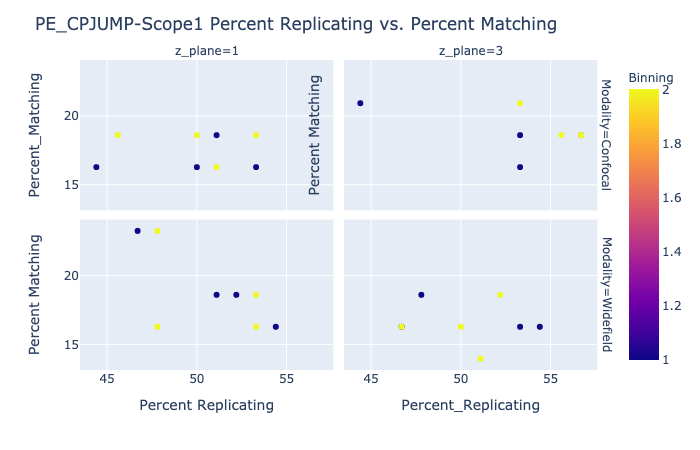

In [16]:
specific_vendor='PE'
fig = px.scatter(data_frame=PE_df, x='Percent_Replicating', y='Percent_Matching', facet_row='Modality',
                 facet_col='z_plane', color='Binning')
fig.update_layout(dict(title='PE_CPJUMP-Scope1 Percent Replicating vs. Percent Matching'),
                  xaxis=dict(title='Percent Replicating'),
                  yaxis=dict(title='Percent Matching'),
                  yaxis4=dict(title='Percent Matching'))
fig.show("png")
fig.write_image('figures/2.PE_percent_replicating_vs_percent_matching_faceted1.png', width=680, height=510, scale=2)

In [17]:
PE_df.head()

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
14,PE,Scope1_PE_Bin1_Confocal_1Plane,CP_Broad_Phenix_C_BIN1_1Plane_P1,50.0,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,5,3,1,NaN,none
15,PE,Scope1_PE_Bin1_Confocal_1Plane,CP_Broad_Phenix_C_BIN1_1Plane_P2,53.3,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,5,3,1,NaN,none
16,PE,Scope1_PE_Bin1_Confocal_1Plane,CP_Broad_Phenix_C_BIN1_1Plane_P3,51.1,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,5,3,1,NaN,none
17,PE,Scope1_PE_Bin1_Confocal_1Plane,CP_Broad_Phenix_C_BIN1_1Plane_P4,44.4,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,5,3,1,NaN,none
18,PE,Scope1_PE_Bin1_Confocal_3Plane,CP_Broad_Phenix_C_BIN1_P1,53.3,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,5,3,3,NaN,none


<ipython-input-18-9a181f1ce8bf>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator



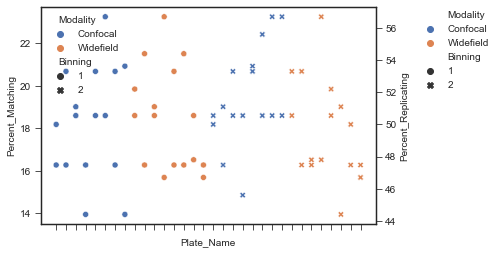

<ipython-input-18-9a181f1ce8bf>:15: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "width" which is no longer supported as of 3.3 and will become an error two minor releases later

<ipython-input-18-9a181f1ce8bf>:15: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "height" which is no longer supported as of 3.3 and will become an error two minor releases later

<ipython-input-18-9a181f1ce8bf>:15: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "scale" which is no longer supported as of 3.3 and will become an error two minor releases later



<Figure size 432x288 with 0 Axes>

In [18]:
ax1 = plt.subplot()
ax2 = ax1.twinx()
chart=sns.scatterplot(data=PE_df, x="Plate_Name", y="Percent_Matching", hue="Modality", style="Binning", 
                palette="deep", ax=ax1)
chart=sns.scatterplot(data=PE_df, x="Plate_Name", y="Percent_Replicating", hue="Modality", style="Binning", 
                palette="deep", ax=ax2)
chart.set_xticklabels(chart.get_xticklabels(),rotation = 30)
plt.legend(bbox_to_anchor=(1.35, 1), borderaxespad=0)
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)

plt.show()
plt.draw()
plt.savefig('figures/2.PE_percent_replicating_vs_percent_matching_perPlate.png', width=700, height=500, scale=2)


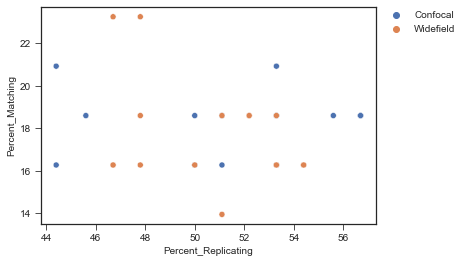

In [19]:
sns.scatterplot(data=PE_df, x='Percent_Replicating', y='Percent_Matching', hue='Modality', palette='deep')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

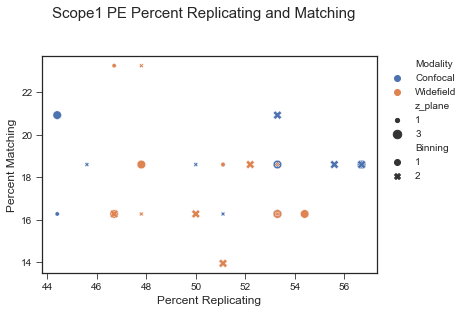

In [20]:
sns.scatterplot(data=PE_df, x='Percent_Replicating', y='Percent_Matching', hue='Modality',
                style='Binning', size='z_plane', palette='deep', legend="full")
plt.xlabel("Percent Replicating", fontsize = 12)
plt.ylabel("Percent Matching", fontsize = 12)
plt.suptitle("Scope1 PE Percent Replicating and Matching", y=1.05, fontsize=15)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.savefig('figures/2.PE_percent_replicating_vs_percent_matching_overview.png',bbox_inches='tight',dpi=300)

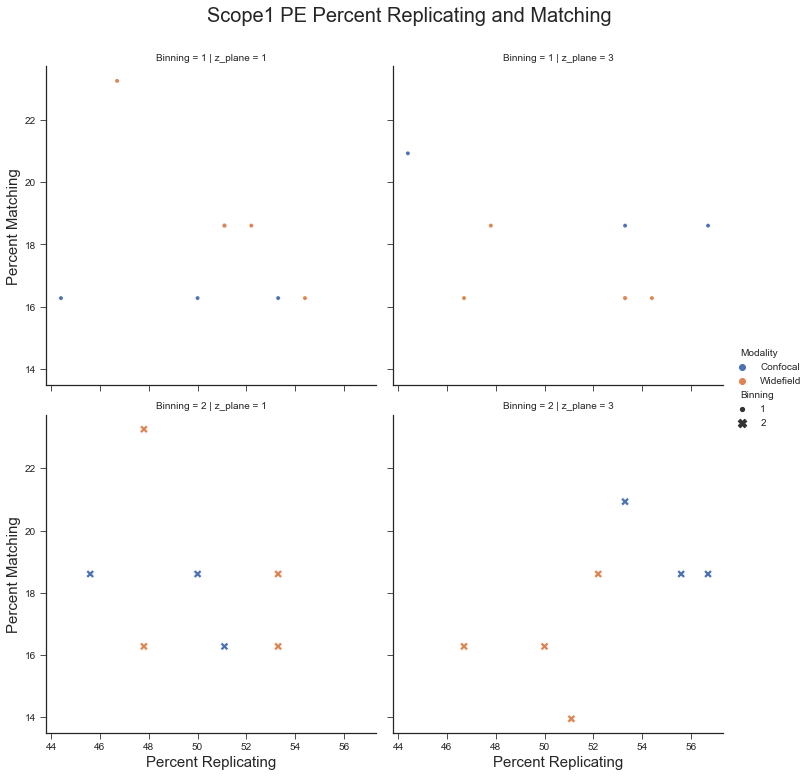

In [21]:
# palette = sns.cubehelix_palette(light=.8, n_colors=6)
g = sns.relplot(data=PE_df, x='Percent_Replicating', y='Percent_Matching', hue='Modality',
                style='Binning', size='Binning', col='z_plane', row='Binning', palette='deep', kind="scatter")
g.set_xlabels("Percent Replicating", fontsize = 15)
g.set_ylabels("Percent Matching", fontsize = 15)
g.fig.suptitle("Scope1 PE Percent Replicating and Matching", y=1.05, fontsize=20)
plt.savefig("figures/2.PE_PercentReplicating_Matching_separateZandbinning.png",bbox_inches='tight',dpi=300)

In [22]:
all_merge_df.columns

Index(['Scope_vendor', 'Batch', 'Plate_Name', 'Percent_Replicating',
       'Percent_Matching', 'Plate_Map_Name', 'Modality', 'Binning',
       'Magnification', 'Number_of_channels', 'Images_per_well', 'z_plane',
       'BF_Zplanes', 'Anomaly'],
      dtype='object')

In [23]:
# columns = ['Scope_vendor', 'Batch', 'Plate_Name']
grouping_columns = ['Scope_vendor', 'Batch', 'Modality', 'Binning','Magnification', 'Number_of_channels',
                    'Images_per_well', 'z_plane']

group_replicating = all_merge_df[grouping_columns+['Percent_Replicating']].copy()
# print(group_replicating.columns)
group_replicating['Mean_Percent_Replicating'] = list(group_replicating['Percent_Replicating'])
group_replicating['SD_Percent_Replicating'] = list(group_replicating['Percent_Replicating'])

group_replicating_df = group_replicating.groupby(grouping_columns).agg({'Percent_Replicating' : lambda x: list(x),
                                                                        'Mean_Percent_Replicating' : lambda y: np.mean(y),
                                                                        'SD_Percent_Replicating' : lambda z: '%.3f'%np.std(z)}).reset_index()

group_replicating_df = group_replicating_df.sort_values(by='Batch')
# print(group_replicating_df.to_markdown(index=False))
group_replicating_df.head(20)


,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating
0,MolDev,Scope1_MolDev_10X,Confocal,1,10,6,4,1,"[33.3, 50.0]",41.650000,8.350
1,MolDev,Scope1_MolDev_10X_4siteZ,Confocal,1,10,6,4,3,[52.2],52.200000,0.000
2,MolDev,Scope1_MolDev_20X_4site,Confocal,1,20,6,4,3,[43.3],43.300000,0.000
3,MolDev,Scope1_MolDev_20X_9site,Confocal,1,20,6,9,1,"[56.7, 50.0]",53.350000,3.350
4,MolDev,Scope1_MolDev_20X_Adaptive,Confocal,1,20,6,3,1,[17.8],17.800000,0.000
5,Nikon,Scope1_Nikon_10X,Widefield,1,10,4,1,1,"[26.7, 39.8, 27.8, 33.7]",32.000000,5.231
6,Nikon,Scope1_Nikon_20X,Widefield,1,20,4,9,1,"[58.9, 43.3, 46.7]",49.633333,6.698
7,PE,Scope1_PE_Bin1_Confocal_1Plane,Confocal,1,20,5,3,1,"[50.0, 53.3, 51.1, 44.4]",49.700000,3.283
8,PE,Scope1_PE_Bin1_Confocal_3Plane,Confocal,1,20,5,3,3,"[53.3, 56.7, 53.3, 44.4]",51.925000,4.561
9,PE,Scope1_PE_Bin1_Widefield_1Plane,Widefield,1,20,5,3,1,"[52.2, 54.4, 51.1, 46.7]",51.100000,2.804


In [24]:
grouping_columns = ['Scope_vendor', 'Batch', 'Modality', 'Binning','Magnification', 'Number_of_channels',
                    'Images_per_well', 'z_plane']
# grouping_columns = ['Scope_vendor', 'Batch']
group_matching = all_merge_df[grouping_columns+['Percent_Matching']].copy()
group_matching['Mean_Percent_Matching'] = list(group_matching['Percent_Matching'])
group_matching['SD_Percent_Matching'] = list(group_matching['Percent_Matching'])

group_matching_df = group_matching.groupby(grouping_columns).agg({'Percent_Matching' : lambda x: list(x),
                                                                  'Mean_Percent_Matching' : lambda y: np.mean(y),
                                                                  'SD_Percent_Matching' : lambda z: '%.3f'%np.std(z)}).reset_index()

group_matching_df = group_matching_df.sort_values(by='Batch')
# print(group_matching_df.to_markdown(index=False))
group_matching_df.head(20)


,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
0,MolDev,Scope1_MolDev_10X,Confocal,1,10,6,4,1,"[18.605, 16.279]",17.442000,1.163
1,MolDev,Scope1_MolDev_10X_4siteZ,Confocal,1,10,6,4,3,[20.93],20.930000,0.000
2,MolDev,Scope1_MolDev_20X_4site,Confocal,1,20,6,4,3,[16.279],16.279000,0.000
3,MolDev,Scope1_MolDev_20X_9site,Confocal,1,20,6,9,1,"[18.605, 13.953]",16.279000,2.326
4,MolDev,Scope1_MolDev_20X_Adaptive,Confocal,1,20,6,3,1,[6.977],6.977000,0.000
5,Nikon,Scope1_Nikon_10X,Widefield,1,10,4,1,1,"[13.953, 14.634, 11.628, 11.905]",13.030000,1.290
6,Nikon,Scope1_Nikon_20X,Widefield,1,20,4,9,1,"[16.279, 16.279, 18.605]",17.054333,1.096
7,PE,Scope1_PE_Bin1_Confocal_1Plane,Confocal,1,20,5,3,1,"[16.279, 16.279, 18.605, 16.279]",16.860500,1.007
8,PE,Scope1_PE_Bin1_Confocal_3Plane,Confocal,1,20,5,3,3,"[18.605, 18.605, 16.279, 20.93]",18.604750,1.644
9,PE,Scope1_PE_Bin1_Widefield_1Plane,Widefield,1,20,5,3,1,"[18.605, 16.279, 18.605, 23.256]",19.186250,2.534


In [25]:
merged_group_df = (
    group_replicating_df.merge(group_matching_df, on=grouping_columns, how='inner')
    .sort_values(by=['Scope_vendor','Batch'], ascending=False)
)

In [26]:
merged_group_df.head(20)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
23,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,Confocal,1,40,6,9,12,[43.3],43.300000,0.000,[13.953],13.953000,0.000
22,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,Confocal,1,20,6,9,12,[53.3],53.300000,0.000,[20.93],20.930000,0.000
21,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,Confocal,1,20,6,9,12,[57.8],57.800000,0.000,[20.93],20.930000,0.000
20,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117033,Confocal,1,20,6,9,12,[14.7],14.700000,0.000,[26.087],26.087000,0.000
19,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,Confocal,1,20,5,9,12,[55.6],55.600000,0.000,[23.256],23.256000,0.000
18,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,Confocal,1,20,5,9,1,"[57.8, 50.0]",53.900000,3.900,"[16.279, 18.605]",17.442000,1.163
17,Yokogawa_US,Scope1_Yokogawa_US_10X,Confocal,1,10,6,4,12,[48.9],48.900000,0.000,[18.605],18.605000,0.000
16,Yokogawa_Japan,Scope1_Yokogawa_Japan_40X,Confocal,1,40,5,2,12,[37.8],37.800000,0.000,[16.279],16.279000,0.000
15,Yokogawa_Japan,Scope1_Yokogawa_Japan_20X,Confocal,1,20,5,9,10,[53.3],53.300000,0.000,[20.93],20.930000,0.000
14,PE,Scope1_PE_Bin2_Widefield_3Plane,Widefield,2,20,5,3,3,"[52.2, 51.1, 50.0, 46.7]",50.000000,2.058,"[18.605, 13.953, 16.279, 16.279]",16.279000,1.645


In [27]:
PE_percentages_df = merged_group_df.query('Scope_vendor=="PE"')
PE_percentages_df.head(20)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
14,PE,Scope1_PE_Bin2_Widefield_3Plane,Widefield,2,20,5,3,3,"[52.2, 51.1, 50.0, 46.7]",50.000,2.058,"[18.605, 13.953, 16.279, 16.279]",16.27900,1.645
13,PE,Scope1_PE_Bin2_Widefield_1Plane,Widefield,2,20,5,3,1,"[53.3, 53.3, 47.8, 47.8]",50.550,2.750,"[18.605, 16.279, 16.279, 23.256]",18.60475,2.848
12,PE,Scope1_PE_Bin2_Confocal_3Plane,Confocal,2,20,5,3,3,"[53.3, 55.6, 56.7, 56.7]",55.575,1.388,"[20.93, 18.605, 18.605, 18.605]",19.18625,1.007
11,PE,Scope1_PE_Bin2_Confocal_1Plane,Confocal,2,20,5,3,1,"[50.0, 51.1, 53.3, 45.6]",50.000,2.804,"[18.605, 16.279, 18.605, 18.605]",18.02350,1.007
10,PE,Scope1_PE_Bin1_Widefield_3Plane,Widefield,1,20,5,3,3,"[53.3, 54.4, 47.8, 46.7]",50.550,3.346,"[16.279, 16.279, 18.605, 16.279]",16.86050,1.007
9,PE,Scope1_PE_Bin1_Widefield_1Plane,Widefield,1,20,5,3,1,"[52.2, 54.4, 51.1, 46.7]",51.100,2.804,"[18.605, 16.279, 18.605, 23.256]",19.18625,2.534
8,PE,Scope1_PE_Bin1_Confocal_3Plane,Confocal,1,20,5,3,3,"[53.3, 56.7, 53.3, 44.4]",51.925,4.561,"[18.605, 18.605, 16.279, 20.93]",18.60475,1.644
7,PE,Scope1_PE_Bin1_Confocal_1Plane,Confocal,1,20,5,3,1,"[50.0, 53.3, 51.1, 44.4]",49.700,3.283,"[16.279, 16.279, 18.605, 16.279]",16.86050,1.007


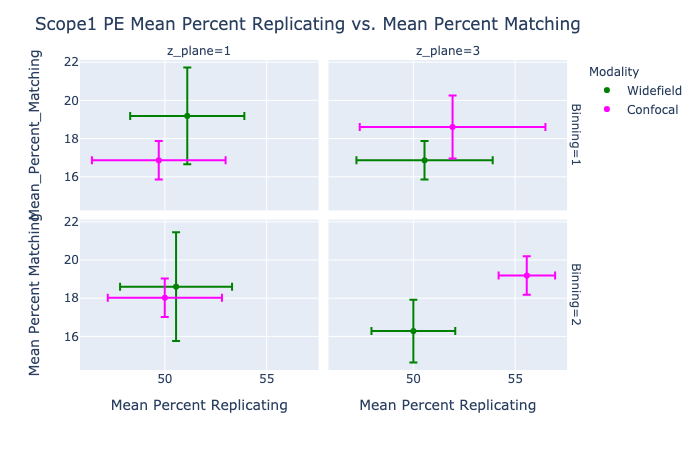

In [28]:
fig = px.scatter(data_frame=PE_percentages_df, x='Mean_Percent_Replicating', y='Mean_Percent_Matching', facet_row='Binning',
                 facet_col='z_plane', color='Modality', error_x='SD_Percent_Replicating', error_y='SD_Percent_Matching',
                 category_orders={'Binning': [1, 2], 'z_plane': [1, 3]}, color_discrete_sequence=["green","magenta"])

fig.update_layout(dict(title='Scope1 PE Mean Percent Replicating vs. Mean Percent Matching'),
                  xaxis=dict(title='Mean Percent Replicating'),
                  xaxis2=dict(title='Mean Percent Replicating'),
                  yaxis=dict(title='Mean Percent Matching'))
fig.show("png")
fig.write_image('figures/2.PE_Mean_percent_replicating_vs_percent_matching.png', width=680, height=510, scale=2)


In [29]:
Nikon_df = all_merge_df.query('Scope_vendor=="Nikon"')
Nikon_df.head(10)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
7,Nikon,Scope1_Nikon_10X,BR00117060a10x,26.7,13.953,JUMP-MOA_compound_platemap,Widefield,1,10,4,1,1,NaN,none
8,Nikon,Scope1_Nikon_10X,BR00117061a10x,39.8,14.634,JUMP-MOA_compound_platemap,Widefield,1,10,4,1,1,NaN,none
9,Nikon,Scope1_Nikon_10X,BR00117062a10x,27.8,11.628,JUMP-MOA_compound_platemap,Widefield,1,10,4,1,1,NaN,none
10,Nikon,Scope1_Nikon_10X,BR00117063b10x,33.7,11.905,JUMP-MOA_compound_platemap,Widefield,1,10,4,1,1,NaN,none
11,Nikon,Scope1_Nikon_20X,BR00117061a,58.9,16.279,JUMP-MOA_compound_platemap,Widefield,1,20,4,9,1,NaN,none
12,Nikon,Scope1_Nikon_20X,BR00117062a,43.3,16.279,JUMP-MOA_compound_platemap,Widefield,1,20,4,9,1,NaN,none
13,Nikon,Scope1_Nikon_20X,BR00117063b,46.7,18.605,JUMP-MOA_compound_platemap,Widefield,1,20,4,9,1,NaN,none


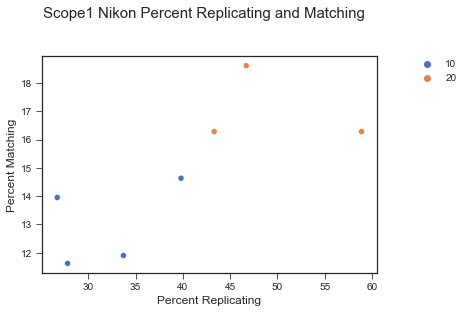

In [30]:
sns.scatterplot(data=Nikon_df, x='Percent_Replicating', y='Percent_Matching', hue='Magnification',
                palette='deep')
plt.xlabel("Percent Replicating", fontsize = 12)
plt.ylabel("Percent Matching", fontsize = 12)
plt.suptitle("Scope1 Nikon Percent Replicating and Matching", y=1.05, fontsize=15)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.savefig('figures/2.Nikon_percent_replicating_vs_percent_matching_overview.png',bbox_inches='tight',dpi=300)

In [31]:
Nikon_percentages_df = merged_group_df.query('Scope_vendor=="Nikon"')
Nikon_percentages_df.head(20)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
6,Nikon,Scope1_Nikon_20X,Widefield,1,20,4,9,1,"[58.9, 43.3, 46.7]",49.633333,6.698,"[16.279, 16.279, 18.605]",17.054333,1.096
5,Nikon,Scope1_Nikon_10X,Widefield,1,10,4,1,1,"[26.7, 39.8, 27.8, 33.7]",32.000000,5.231,"[13.953, 14.634, 11.628, 11.905]",13.030000,1.290


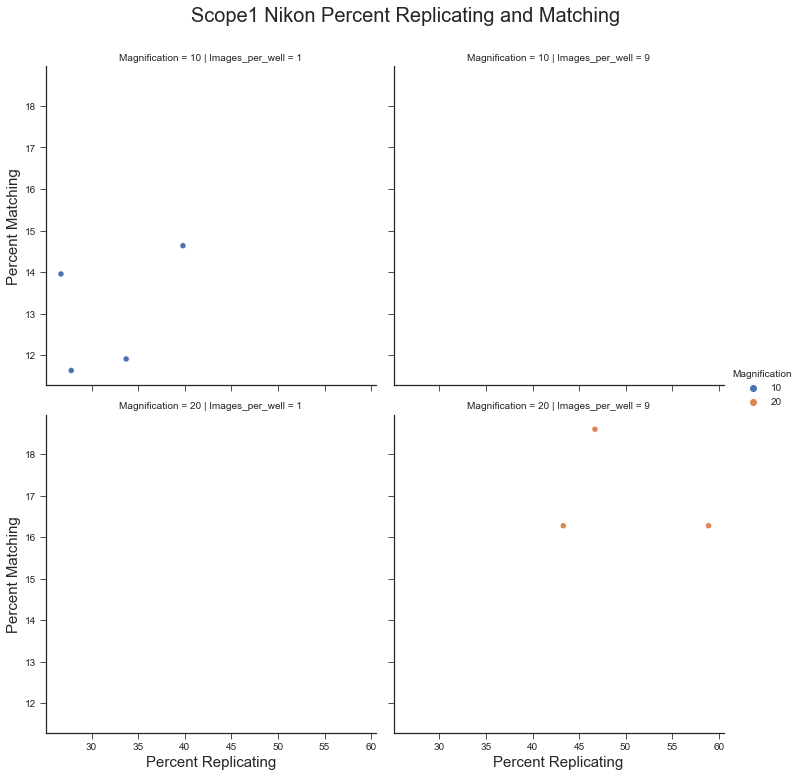

In [32]:
g = sns.relplot(data=Nikon_df, x='Percent_Replicating', y='Percent_Matching', hue='Magnification',
                col='Images_per_well', row='Magnification', palette='deep', kind="scatter")
g.set_xlabels("Percent Replicating", fontsize = 15)
g.set_ylabels("Percent Matching", fontsize = 15)
g.fig.suptitle("Scope1 Nikon Percent Replicating and Matching", y=1.05, fontsize=20)
plt.savefig("figures/2.Nikon_PercentReplicating_Matching_Imgperwell_faceted.png",bbox_inches='tight',dpi=300)

<ipython-input-33-c2522d335cc2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



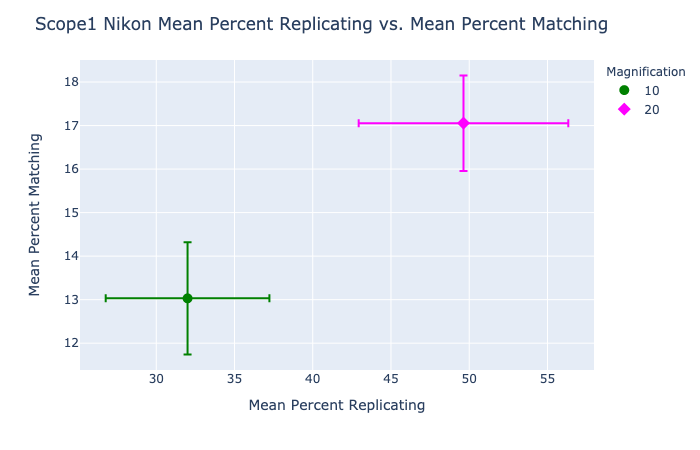

In [33]:
Nikon_percentages_df["Magnification"] = Nikon_percentages_df["Magnification"].astype(str)
fig = px.scatter(data_frame=Nikon_percentages_df, x='Mean_Percent_Replicating', y='Mean_Percent_Matching', 
                 color='Magnification', symbol='Magnification', error_x='SD_Percent_Replicating', error_y='SD_Percent_Matching',
                 category_orders={'Magnification': ['10', '20']},color_discrete_sequence=["green","magenta"])
fig.update_traces(marker_size=10)
fig.update_layout(dict(title='Scope1 Nikon Mean Percent Replicating vs. Mean Percent Matching'),
                  xaxis=dict(title='Mean Percent Replicating'),
                  yaxis=dict(title='Mean Percent Matching'))
fig.show("png")
fig.write_image('figures/2.Nikon_Mean_percent_replicating_vs_percent_matching.png', width=680, height=510, scale=2)


In [34]:
Yokogawa_Japan_df = all_merge_df.query('Scope_vendor=="Yokogawa_Japan"')
Yokogawa_Japan_df.head(10)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
46,Yokogawa_Japan,Scope1_Yokogawa_Japan_20X,20201021T092317,53.3,20.930,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,10,NaN,none
47,Yokogawa_Japan,Scope1_Yokogawa_Japan_40X,20201020T134356,37.8,16.279,JUMP-MOA_compound_platemap,Confocal,1,40,5,2,12,none,none


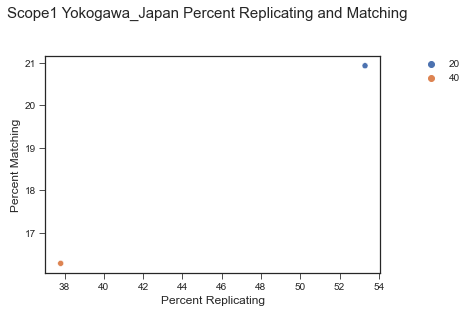

In [35]:
sns.scatterplot(data=Yokogawa_Japan_df, x='Percent_Replicating', y='Percent_Matching', hue='Magnification',
                palette='deep')
plt.xlabel("Percent Replicating", fontsize = 12)
plt.ylabel("Percent Matching", fontsize = 12)
plt.suptitle("Scope1 Yokogawa_Japan Percent Replicating and Matching", y=1.05, fontsize=15)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

plt.savefig('figures/2.Yokogawa_Japan_percent_replicating_vs_percent_matching_overview.png',bbox_inches='tight',dpi=300)


In [36]:
Yokogawa_Japan_percentages_df = merged_group_df.query('Scope_vendor=="Yokogawa_Japan"')
Yokogawa_Japan_percentages_df.head(20)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
16,Yokogawa_Japan,Scope1_Yokogawa_Japan_40X,Confocal,1,40,5,2,12,[37.8],37.8,0.000,[16.279],16.279,0.000
15,Yokogawa_Japan,Scope1_Yokogawa_Japan_20X,Confocal,1,20,5,9,10,[53.3],53.3,0.000,[20.93],20.930,0.000


In [37]:
# Yokogawa_Japan_percentages_df["Magnification"] = Yokogawa_Japan_percentages_df["Magnification"].astype(str)
# fig = px.scatter(data_frame=Yokogawa_Japan_percentages_df, x='Mean_Percent_Replicating', y='Mean_Percent_Matching', 
#                  color='Magnification', symbol='Magnification', error_x='SD_Percent_Replicating', error_y='SD_Percent_Matching',
#                  category_orders={'Magnification': ['20', '40']},color_discrete_sequence=["green","magenta"])

# fig.update_traces(marker_size=10)
# fig.update_layout(dict(title='Scope1 Yokogawa_Japan Mean Percent Replicating vs. Mean Percent Matching'),
#                   xaxis=dict(title='Mean Percent Replicating'),
#                   yaxis=dict(title='Mean Percent Matching'))
# fig.show("png")

# fig.write_image('figures/2.Yokogawa_Japan_Mean_percent_replicating_vs_percent_matching.png', width=680, height=510, scale=2)

In [38]:
Yokogawa_US_df = all_merge_df.query('Scope_vendor=="Yokogawa_US"')
Yokogawa_US_df.head(10)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
48,Yokogawa_US,Scope1_Yokogawa_US_10X,BRO0117014_10x,48.9,18.605,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,12,10,none
49,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,BRO0117033_20xb,57.8,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,1,none,none
50,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,BRO0117056_20x,50.0,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,1,none,none
51,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,BRO0117056_20xb,55.6,23.256,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,12,none,none
52,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117033,BRO0117033_20x,14.7,26.087,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,12,11,none
53,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,BRO0117059_20X,57.8,20.930,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,12,15,none
54,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,BRO01177034_20x,53.3,20.930,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,12,13,none
55,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,43.3,13.953,JUMP-MOA_compound_platemap,Confocal,1,40,6,9,12,15,none


In [39]:
Yokogawa_US_df = Yokogawa_US_df.drop([52])
Yokogawa_US_df.head(10)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
48,Yokogawa_US,Scope1_Yokogawa_US_10X,BRO0117014_10x,48.9,18.605,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,12,10,none
49,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,BRO0117033_20xb,57.8,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,1,none,none
50,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,BRO0117056_20x,50.0,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,1,none,none
51,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,BRO0117056_20xb,55.6,23.256,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,12,none,none
53,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,BRO0117059_20X,57.8,20.930,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,12,15,none
54,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,BRO01177034_20x,53.3,20.930,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,12,13,none
55,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,43.3,13.953,JUMP-MOA_compound_platemap,Confocal,1,40,6,9,12,15,none


In [40]:
Yokogawa_US_df.head(10)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
48,Yokogawa_US,Scope1_Yokogawa_US_10X,BRO0117014_10x,48.9,18.605,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,12,10,none
49,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,BRO0117033_20xb,57.8,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,1,none,none
50,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,BRO0117056_20x,50.0,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,1,none,none
51,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,BRO0117056_20xb,55.6,23.256,JUMP-MOA_compound_platemap,Confocal,1,20,5,9,12,none,none
53,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,BRO0117059_20X,57.8,20.930,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,12,15,none
54,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,BRO01177034_20x,53.3,20.930,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,12,13,none
55,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,43.3,13.953,JUMP-MOA_compound_platemap,Confocal,1,40,6,9,12,15,none


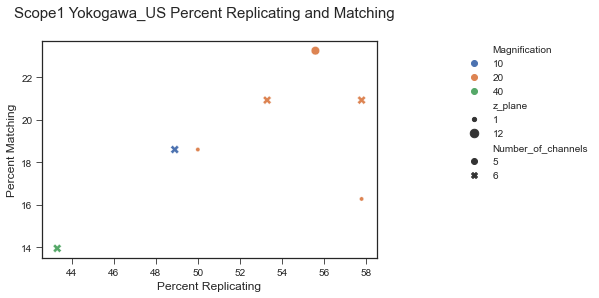

In [41]:
sns.scatterplot(data=Yokogawa_US_df, x='Percent_Replicating', y='Percent_Matching', hue='Magnification',
                style='Number_of_channels', size='z_plane', palette='deep')
plt.xlabel("Percent Replicating", fontsize = 12)
plt.ylabel("Percent Matching", fontsize = 12)
plt.suptitle("Scope1 Yokogawa_US Percent Replicating and Matching", y=1, fontsize=15)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

plt.savefig('figures/2.Yokogawa_US_percent_replicating_vs_percent_matching_overview.png',bbox_inches='tight',dpi=300)

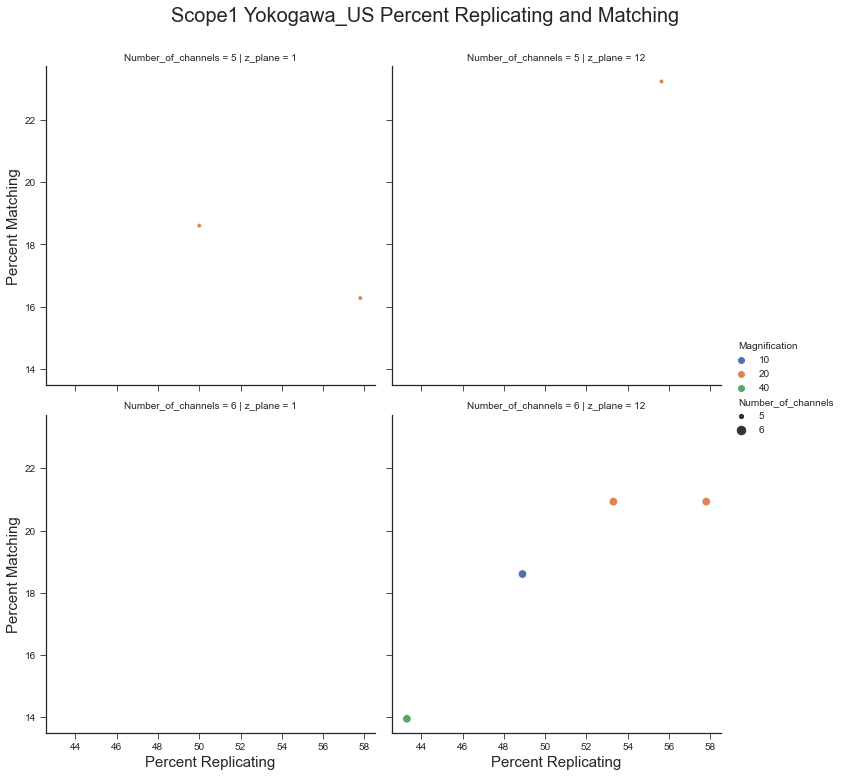

In [42]:
# palette = sns.cubehelix_palette(light=.8, n_colors=6)
g = sns.relplot(data=Yokogawa_US_df, x='Percent_Replicating', y='Percent_Matching', hue='Magnification',
                size='Number_of_channels', col='z_plane', row='Number_of_channels', palette='deep', kind="scatter")
g.set_xlabels("Percent Replicating", fontsize = 15)
g.set_ylabels("Percent Matching", fontsize = 15)
g.fig.suptitle("Scope1 Yokogawa_US Percent Replicating and Matching", y=1.05, fontsize=20)
plt.savefig("figures/2.Yoko_US_PercentReplicating_Matching_separateZandbinning.png",bbox_inches='tight',dpi=300)

In [43]:
Yokogawa_US_percentages_df = merged_group_df.query('Scope_vendor=="Yokogawa_US"')
Yokogawa_US_percentages_df.head(20)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
23,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,Confocal,1,40,6,9,12,[43.3],43.3,0.000,[13.953],13.953,0.000
22,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,Confocal,1,20,6,9,12,[53.3],53.3,0.000,[20.93],20.930,0.000
21,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,Confocal,1,20,6,9,12,[57.8],57.8,0.000,[20.93],20.930,0.000
20,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117033,Confocal,1,20,6,9,12,[14.7],14.7,0.000,[26.087],26.087,0.000
19,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,Confocal,1,20,5,9,12,[55.6],55.6,0.000,[23.256],23.256,0.000
18,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,Confocal,1,20,5,9,1,"[57.8, 50.0]",53.9,3.900,"[16.279, 18.605]",17.442,1.163
17,Yokogawa_US,Scope1_Yokogawa_US_10X,Confocal,1,10,6,4,12,[48.9],48.9,0.000,[18.605],18.605,0.000


In [44]:
Yokogawa_US_percentages_df=Yokogawa_US_percentages_df.drop([20])

In [45]:
Yokogawa_US_percentages_df.head(20)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
23,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,Confocal,1,40,6,9,12,[43.3],43.3,0.000,[13.953],13.953,0.000
22,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,Confocal,1,20,6,9,12,[53.3],53.3,0.000,[20.93],20.930,0.000
21,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,Confocal,1,20,6,9,12,[57.8],57.8,0.000,[20.93],20.930,0.000
19,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch_12Z,Confocal,1,20,5,9,12,[55.6],55.6,0.000,[23.256],23.256,0.000
18,Yokogawa_US,Scope1_Yokogawa_US_20X_5Ch,Confocal,1,20,5,9,1,"[57.8, 50.0]",53.9,3.900,"[16.279, 18.605]",17.442,1.163
17,Yokogawa_US,Scope1_Yokogawa_US_10X,Confocal,1,10,6,4,12,[48.9],48.9,0.000,[18.605],18.605,0.000


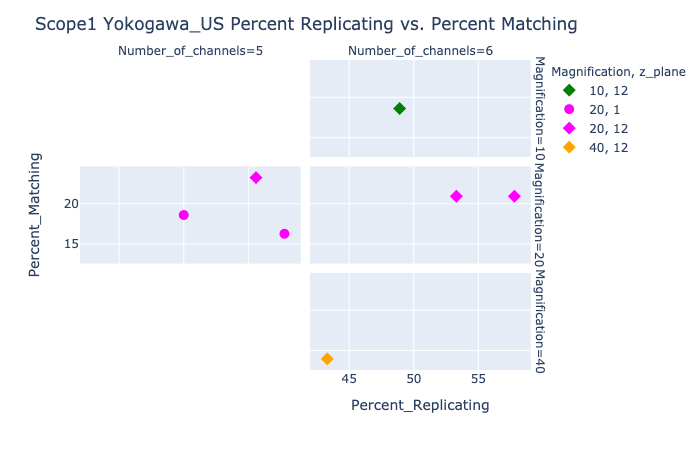

In [46]:
Yokogawa_US_df["z_plane"] = Yokogawa_US_df["z_plane"].astype(str)
Yokogawa_US_df["Magnification"] = Yokogawa_US_df["Magnification"].astype(str)
fig = px.scatter(data_frame=Yokogawa_US_df, x='Percent_Replicating', y='Percent_Matching', 
                 facet_row='Magnification', facet_col='Number_of_channels', color='Magnification', symbol='z_plane', 
                 category_orders={'Number_of_channels': [5, 6], 'z_plane':['1', '12'] , 'Magnification': ['10', '20', '40']},color_discrete_sequence=["green","magenta","orange"])


fig.update_traces(marker_size=10)
fig.update_layout(dict(title='Scope1 Yokogawa_US Percent Replicating vs. Percent Matching'),
                  xaxis=dict(title='Percent Replicating'),
                  yaxis=dict(title='Percent Matching'))
fig.show("png")
fig.write_image('figures/2.Yoko_US_percent_replicating_vs_percent_matching.png', width=680, height=510, scale=2)

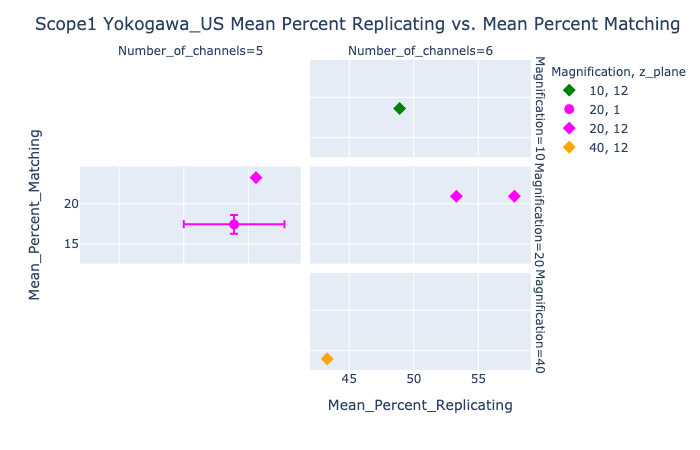

In [47]:
Yokogawa_US_percentages_df["z_plane"] = Yokogawa_US_percentages_df["z_plane"].astype(str)
Yokogawa_US_percentages_df["Magnification"] = Yokogawa_US_percentages_df["Magnification"].astype(str)

fig = px.scatter(data_frame=Yokogawa_US_percentages_df, x='Mean_Percent_Replicating', y='Mean_Percent_Matching', 
                 facet_row='Magnification', facet_col='Number_of_channels', color='Magnification', symbol='z_plane', 
                 error_x='SD_Percent_Replicating', error_y='SD_Percent_Matching',
                 category_orders={'Number_of_channels': [5, 6], 'z_plane':['1', '12'] , 'Magnification': ['10', '20', '40']},color_discrete_sequence=["green","magenta","orange"])


fig.update_traces(marker_size=10)
fig.update_layout(dict(title='Scope1 Yokogawa_US Mean Percent Replicating vs. Mean Percent Matching'),
                  xaxis=dict(title='Mean Percent Replicating'),
                  yaxis=dict(title='Mean Percent Matching'))
fig.show("png")
fig.write_image('figures/2.Yoko_US_Mean_percent_replicating_vs_percent_matching.png', width=680, height=510, scale=2)


In [48]:
MolDev_df = all_merge_df.query('Scope_vendor=="MolDev"')
MolDev_df.head(10)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,33.3,18.605,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,1,NaN,none
1,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,50.0,16.279,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,1,NaN,none
2,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,52.2,20.930,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,3,NaN,none
3,MolDev,Scope1_MolDev_20X_4site,Plate3_PCO_6ch_4site_20XPA_Crestz,43.3,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,6,4,3,NaN,none
4,MolDev,Scope1_MolDev_20X_9site,Plate2_PCO_6ch_9site_20XPA,56.7,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,1,NaN,none
5,MolDev,Scope1_MolDev_20X_9site,Plate3_PCO_6ch_9site_20XPA_Crest,50.0,13.953,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,1,NaN,none
6,MolDev,Scope1_MolDev_20X_Adaptive,Plate3_PCO_6ch_Adaptive_20XPA,17.8,6.977,JUMP-MOA_compound_platemap,Confocal,1,20,6,3,1,NaN,none


In [49]:
MolDev_df = MolDev_df.drop([6])
MolDev_df.head(10)

,Scope_vendor,Batch,Plate_Name,Percent_Replicating,Percent_Matching,Plate_Map_Name,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,BF_Zplanes,Anomaly
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,33.3,18.605,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,1,NaN,none
1,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,50.0,16.279,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,1,NaN,none
2,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,52.2,20.930,JUMP-MOA_compound_platemap,Confocal,1,10,6,4,3,NaN,none
3,MolDev,Scope1_MolDev_20X_4site,Plate3_PCO_6ch_4site_20XPA_Crestz,43.3,16.279,JUMP-MOA_compound_platemap,Confocal,1,20,6,4,3,NaN,none
4,MolDev,Scope1_MolDev_20X_9site,Plate2_PCO_6ch_9site_20XPA,56.7,18.605,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,1,NaN,none
5,MolDev,Scope1_MolDev_20X_9site,Plate3_PCO_6ch_9site_20XPA_Crest,50.0,13.953,JUMP-MOA_compound_platemap,Confocal,1,20,6,9,1,NaN,none


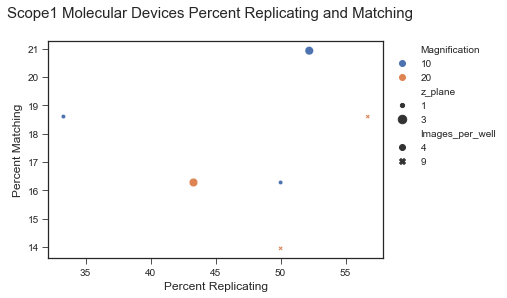

In [50]:
sns.scatterplot(data=MolDev_df, x='Percent_Replicating', y='Percent_Matching', hue='Magnification',
                style='Images_per_well', size='z_plane', palette='deep')
plt.xlabel("Percent Replicating", fontsize = 12)
plt.ylabel("Percent Matching", fontsize = 12)
plt.suptitle("Scope1 Molecular Devices Percent Replicating and Matching", y=1, fontsize=15)
plt.legend(bbox_to_anchor=(1.35, 1), borderaxespad=0)

plt.savefig("figures/2.MolDev_PercentReplicating_Matching_overview.png",bbox_inches='tight',dpi=300)

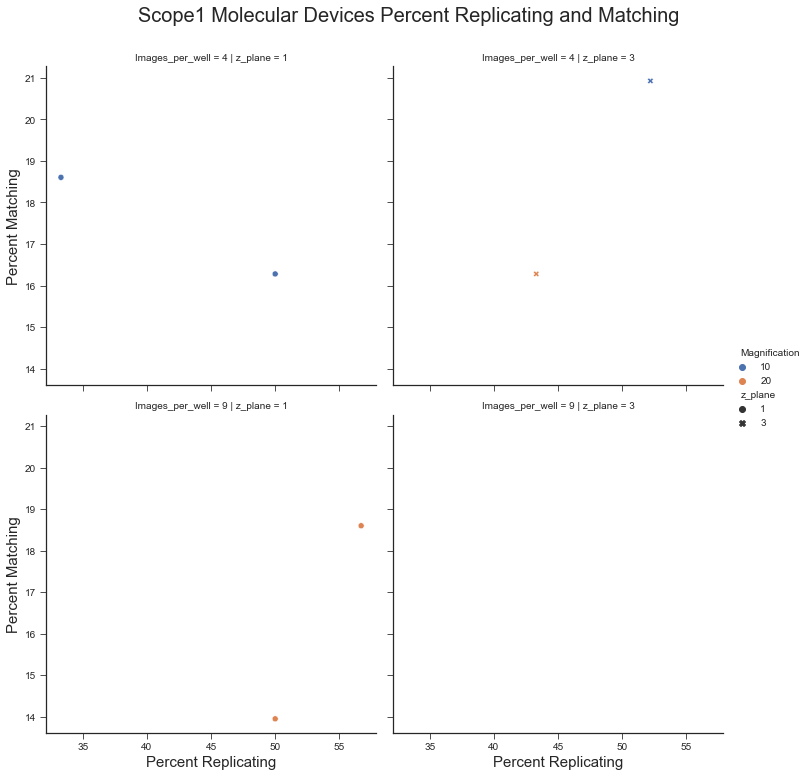

In [51]:
g = sns.relplot(data=MolDev_df, x='Percent_Replicating', y='Percent_Matching', hue='Magnification',
                style='z_plane', col='z_plane', row='Images_per_well', palette='deep', kind="scatter")
g.set_xlabels("Percent Replicating", fontsize = 15)
g.set_ylabels("Percent Matching", fontsize = 15)
g.fig.suptitle("Scope1 Molecular Devices Percent Replicating and Matching", y=1.05, fontsize=20)
plt.savefig("figures/2.MolDev_PercentReplicating_Matching_faceted_1.png",bbox_inches='tight',dpi=300)

In [52]:
MolDev_percentages_df = merged_group_df.query('Scope_vendor=="MolDev"')
MolDev_percentages_df.head(20)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
4,MolDev,Scope1_MolDev_20X_Adaptive,Confocal,1,20,6,3,1,[17.8],17.80,0.000,[6.977],6.977,0.000
3,MolDev,Scope1_MolDev_20X_9site,Confocal,1,20,6,9,1,"[56.7, 50.0]",53.35,3.350,"[18.605, 13.953]",16.279,2.326
2,MolDev,Scope1_MolDev_20X_4site,Confocal,1,20,6,4,3,[43.3],43.30,0.000,[16.279],16.279,0.000
1,MolDev,Scope1_MolDev_10X_4siteZ,Confocal,1,10,6,4,3,[52.2],52.20,0.000,[20.93],20.930,0.000
0,MolDev,Scope1_MolDev_10X,Confocal,1,10,6,4,1,"[33.3, 50.0]",41.65,8.350,"[18.605, 16.279]",17.442,1.163


In [53]:
MolDev_percentages_df = MolDev_percentages_df.drop([4])
MolDev_percentages_df.head(10)

,Scope_vendor,Batch,Modality,Binning,Magnification,Number_of_channels,Images_per_well,z_plane,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching
3,MolDev,Scope1_MolDev_20X_9site,Confocal,1,20,6,9,1,"[56.7, 50.0]",53.35,3.350,"[18.605, 13.953]",16.279,2.326
2,MolDev,Scope1_MolDev_20X_4site,Confocal,1,20,6,4,3,[43.3],43.30,0.000,[16.279],16.279,0.000
1,MolDev,Scope1_MolDev_10X_4siteZ,Confocal,1,10,6,4,3,[52.2],52.20,0.000,[20.93],20.930,0.000
0,MolDev,Scope1_MolDev_10X,Confocal,1,10,6,4,1,"[33.3, 50.0]",41.65,8.350,"[18.605, 16.279]",17.442,1.163


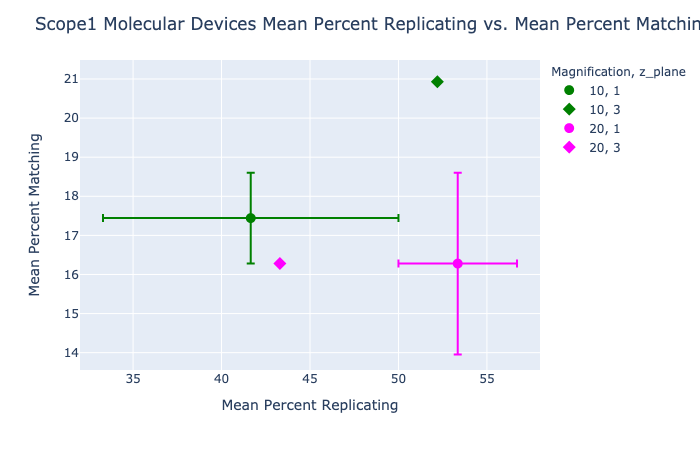

In [54]:
MolDev_percentages_df["Magnification"] = MolDev_percentages_df["Magnification"].astype(str)
MolDev_percentages_df["z_plane"] = MolDev_percentages_df["z_plane"].astype(str)
fig = px.scatter(data_frame=MolDev_percentages_df, x='Mean_Percent_Replicating', y='Mean_Percent_Matching', 
                 color='Magnification', symbol='z_plane', error_x='SD_Percent_Replicating', error_y='SD_Percent_Matching',
                 category_orders={'z_plane':['1', '3'] , 'Magnification': ['10', '20']}, color_discrete_sequence=["green","magenta","orange"])

fig.update_traces(marker_size=10)
fig.update_layout(dict(title='Scope1 Molecular Devices Mean Percent Replicating vs. Mean Percent Matching'),
                  xaxis=dict(title='Mean Percent Replicating'),
                  yaxis=dict(title='Mean Percent Matching'))
fig.show("png")
fig.write_image('figures/2.MolDev_Mean_percent_replicating_vs_percent_matching_faceted_Z.png', width=680, height=510, scale=2)


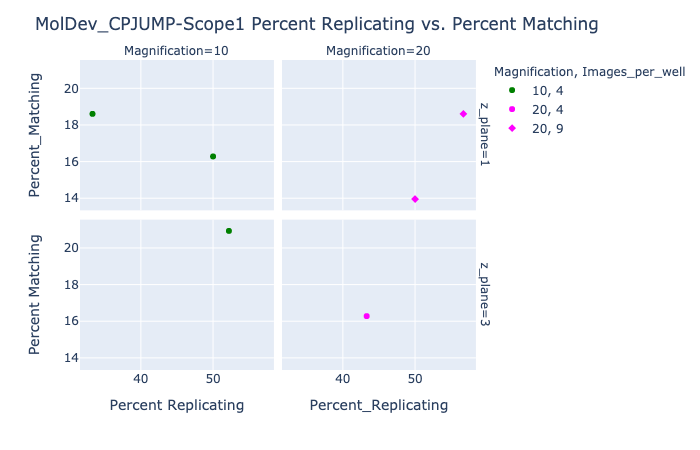

In [55]:
MolDev_df["Images_per_well"] = MolDev_df["Images_per_well"].astype(str)
MolDev_df["Magnification"] = MolDev_df["Magnification"].astype(str)
fig = px.scatter(data_frame=MolDev_df, x='Percent_Replicating', y='Percent_Matching', facet_row='z_plane',
                 facet_col='Magnification', color='Magnification', symbol='Images_per_well',
                 category_orders={'Magnification': ['10', '20'], 'z_plane': [1, 3]}, color_discrete_sequence=["green","magenta","orange"])
fig.update_layout(dict(title='MolDev_CPJUMP-Scope1 Percent Replicating vs. Percent Matching'),
                  xaxis=dict(title='Percent Replicating'),
                  yaxis=dict(title='Percent Matching'))
fig.show("png")
fig.write_image('figures/2.MolDev_percent_replicating_vs_percent_matching_Facted_ImgperWell.png', width=680, height=510, scale=2)

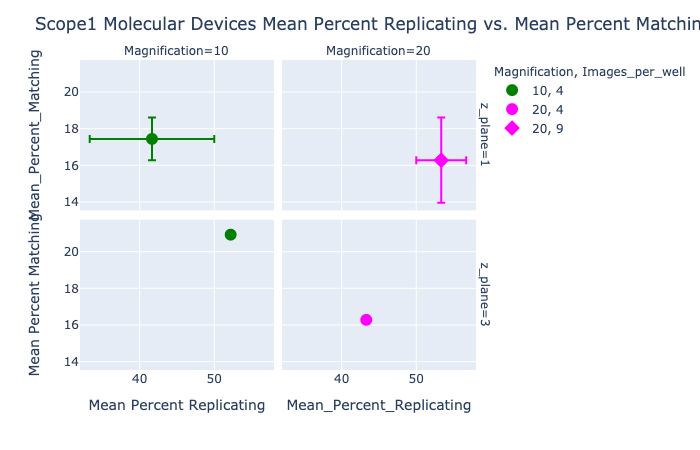

In [56]:
MolDev_percentages_df["Images_per_well"] = MolDev_percentages_df["Images_per_well"].astype(str)
MolDev_percentages_df["Magnification"] = MolDev_percentages_df["Magnification"].astype(str)
fig = px.scatter(data_frame=MolDev_percentages_df, x='Mean_Percent_Replicating', y='Mean_Percent_Matching', 
                 facet_row='z_plane', facet_col='Magnification', color='Magnification', symbol='Images_per_well', 
                 error_x='SD_Percent_Replicating', error_y='SD_Percent_Matching',
                 category_orders={'Magnification': ['10', '20'], 'Images_per_well':['4','9'] , 'z_plane': [1, 3]}, color_discrete_sequence=["green","magenta","orange"])

# fig = px.scatter(data_frame=PE_percentages_df, x='Mean_Percent_Replicating', y='Mean_Percent_Matching', facet_row='Binning',
#                  facet_col='z_plane', color='Modality', error_x='SD_Percent_Replicating', error_y='SD_Percent_Matching',
#                  category_orders={'Binning': [1, 2], 'z_plane': [1, 3]}, color_discrete_sequence=["green","magenta"])


fig.update_traces(marker_size=12)
fig.update_layout(dict(title='Scope1 Molecular Devices Mean Percent Replicating vs. Mean Percent Matching'),
                  xaxis=dict(title='Mean Percent Replicating'),
                  yaxis=dict(title='Mean Percent Matching'))
fig.show("png")
fig.write_image('figures/2.MolDev_Mean_percent_replicating_vs_percent_matching_facted_imgperWell.png', width=680, height=510, scale=2)